![ups logo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png/640px-Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png)

## Aprendizaje Automático P64

## Practica 04


### Árboles de decisión, Random Forest (RF) y Máquinas de Soporte Vectorial (SVM)

### Fase 1: Analisis exploratorio y preparacionde los datos

### Autor: Diego Tapia

### Indice

1. [Importación de librerías](#importacion-de-librerias)
2. [Carga y Descripción del Dataset](#carga-y-descripcion-del-dataset)
3. [Eliminación de variables y separación de variable de salida](#eliminacion-de-variables-y-separacion-de-variable-de-salida)
4. [Diseño de transformadores](#diseno-de-transformadores)
5. [Diseño de pipeline](#diseno-de-pipeline)
6. [Transformación de variables](#transformacion-de-variables)


### Importación de librerías
<a id="importacion-de-librerias"></a>

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config   
from sklearn.ensemble import RandomForestClassifier

print("Módulos y clases importados")

2024-06-12 11:08:32.939091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 11:08:34.405534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Módulos y clases importados


### Carga y Descripción del Dataset
<a id="carga-y-descripcion-del-dataset"></a>

Nombre del dataset: Heart Failure Prediction - Clinical Records.

Enlace: https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records

Este conjunto de datos contiene los registros médicos de 5000 pacientes que sufrieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas.

Información de las variables:

- age (edad): edad del paciente (años)

- anaemia (anemia): disminución de glóbulos rojos o hemoglobina (booleano)

- creatinine phosphokinase (CPK) (fosfocinasa de creatina): nivel de la enzima CPK en la sangre (mcg/L)

- diabetes: si el paciente tiene diabetes (booleano)

- ejection fraction (fracción de eyección): porcentaje de sangre que sale del corazón en cada contracción (porcentaje)

- high blood pressure (hipertensión): si el paciente tiene hipertensión (booleano)

- platelets (plaquetas): plaquetas en la sangre (kiloplaquetas/mL)

- sex (sexo): mujer u hombre (binario)

- serum creatinine (creatinina sérica): nivel de creatinina sérica en la sangre (mg/dL)

- serum sodium (sodio sérico): nivel de sodio sérico en la sangre (mEq/L)

- smoking (fumar): si el paciente fuma o no (booleano)

- time (tiempo): período de seguimiento (días)

- DEATH_EVENT (evento de muerte, Salida): si el paciente murió durante el período de seguimiento (booleano)



Número de Variables (o atributos): 13

Número de instancias (clientes en el banco): 5000

Salida: DEATH_EVENT (sobrevivio: 1, Fallecio: 0)

In [5]:
dataframe = pd.read_csv('dataset/heart_failure_clinical_records.csv', sep = ',', header=0)
print(f"Cantidad de observaciones: {dataframe.shape[0]}")
print(f"Cantidad de variables: {dataframe.shape[1]}")
dataframe.head()

Cantidad de observaciones: 5000
Cantidad de variables: 13


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


### Resumen Estadistico
<a id="resumen-estadistico"></a> 

In [6]:
dataframe.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


La variable age (edad) tiene una media de 60, por lo que nuestra primera hipótesis es que a mayor edad una persona es más propensa a sufrir un ataque cardiaco. El valor mínimo es de edad 40 años, por lo que estamos frente a una población adulta 

### Visualización de datos 
<a id="visualizacion-de-datos"></a> 

Por comodidad renombramos la variable objetivo de DEATH_EVENT a “Y”

In [25]:
dataframe.rename(columns={'DEATH_EVENT': 'Y'}, inplace=True)
dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Y
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


#### Gráfico de frecuencias variable de salida 


/tmp/ipykernel_8441/3306466861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y, palette='viridis')


Y
0    3432
1    1568
Name: count, dtype: int64

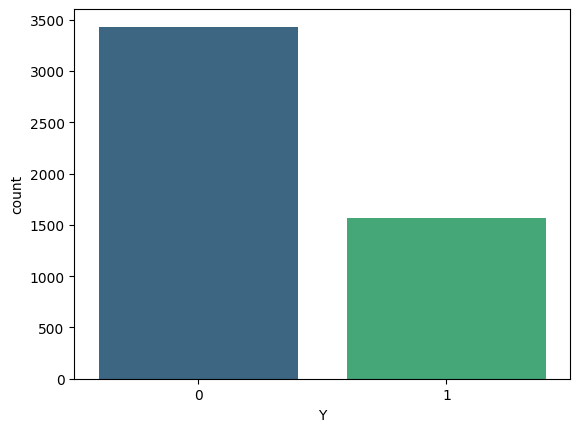

In [26]:
Y = dataframe['Y']
sns.countplot(x=Y, palette='viridis')
dataframe['Y'].value_counts()

#### Gráfico de frecuencias variable 'sex'

/tmp/ipykernel_8441/4016160658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y, palette='viridis')


sex
1    3228
0    1772
Name: count, dtype: int64

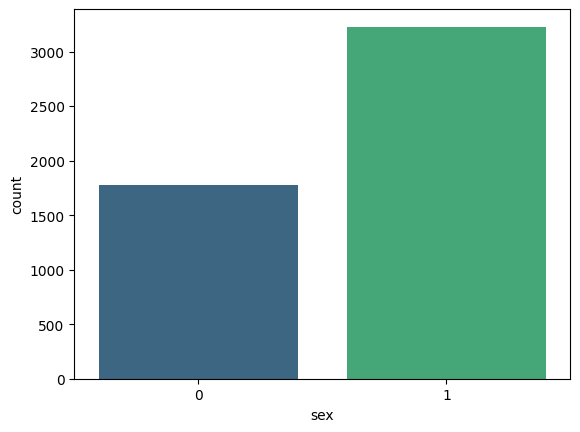

In [22]:
Y = dataframe['sex']
sns.countplot(x=Y, palette='viridis')
dataframe['sex'].value_counts()

La variable sexo está representada con 0 y 1, siendo 0: femenino y 1: masculino, al momento de entrenar un modelo se daría más peso al sexo masculino y eso llevaria a un sesgo y discriminación, por lo que esta variable se considerara categórica por lo que será transformada usando codificación binaria (OneHotEncoder)

Convertimos 1 y 0s en ‘male’ y ‘female’  

In [28]:
dataframe['sex'] = dataframe['sex'].replace({0: 'female', 1: 'male'})
dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Y
0,55.0,0,748,0,45,0,263358.03,1.3,137,male,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,male,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,female,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,male,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,male,0,50,1


### Análisis de variables categóricas

La unica variable categórica que se tiene es la variable 'sex'


In [30]:
columnas_numericas = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = dataframe.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:")
print(columnas_numericas)
print("Cantidad:", len(columnas_numericas))

print("\nVariables categóricas:")
print(columnas_categoricas)
print("Cantidad:", len(columnas_categoricas))

Variables numéricas:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time', 'Y']
Cantidad: 12

Variables categóricas:
['sex']
Cantidad: 1


### Diseño de transformadores

Usamos un transformador para convertir la variable categórica (nominal) a una codificación binaria con OneHotEncoder  

In [32]:
categorical_nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = "ignore"))])

preprocesorCategorico = ColumnTransformer(
    transformers=[
        ('catnom', categorical_nominal_transformer, columnas_categoricas)
    ],remainder='passthrough',n_jobs=2)

 

Los valores numéricos se normalizan [0, 1] 

In [39]:
#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
# descartando la variable de salida, y al reemplazar la variable sex por sex_male y sex_female se tiene un total de 13 variables
total_variables = 13 

minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(total_variables)))
], remainder ='passthrough')

### Diseño de pipeline

Se crea un pipeline que contendrá los procesadores definidos anteriormente.



In [40]:

pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategorico), 
    ('prepminmax', preprocesorMinMax)
])

### Transformación de variables


Se extrae la variable de salida Y

In [36]:
Y = dataframe['Y']
dataframe.drop(['Y'], axis=1, inplace=True)
dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,male,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,male,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,female,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,male,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,male,0,50


In [49]:
#columnas_numericas.remove('Y')
print(len(columnas_numericas))
print(columnas_numericas)

11
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time']


Se ejecuta el pipeline

In [50]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
print(dataframeTransformado.shape)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(columnas_categoricas)!=0:
    cnamesDataset2 = pipe.named_steps['prepcn'].named_transformers_['catnom'].named_steps['onehot'].get_feature_names_out(columnas_categoricas)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = columnas_numericas
cnamesDataset1.extend(cnamesDataset3)
print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("dataset/dataset_transformed_heart_failure.csv", sep=",",index = False)
dataframeTransformado.head()

(5000, 12)
********** Pipeline aplicado
********** Transformador categórico nominal:
('remainder', FunctionTransformer(accept_sparse=True, check_inverse=False,
                    feature_names_out='one-to-one'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11])
********** Cantidad de variables: 13
********** Lista de variables:
['sex_female', 'sex_male', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time']


,sex_female,sex_male,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,Y
0,0.0,1.0,0.272727,0.0,0.092498,0.0,0.469697,0.0,0.288833,0.089888,0.685714,1.0,0.298932,0
1,0.0,1.0,0.454545,0.0,0.004210,0.0,0.166667,0.0,0.339314,0.505618,0.485714,0.0,0.722420,0
2,1.0,0.0,0.090909,0.0,0.071319,1.0,0.363636,0.0,0.356286,0.044944,0.771429,0.0,0.854093,0
3,0.0,1.0,0.363636,1.0,0.093264,1.0,0.393939,1.0,0.367196,0.078652,0.371429,0.0,0.306050,0
4,0.0,1.0,1.000000,1.0,0.071319,0.0,0.242424,0.0,0.528428,0.168539,0.542857,0.0,0.163701,1


### Exportacion del pipeline


In [51]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [52]:
guardarPipeline(pipe,"pipeline_heart_failure")

### Análisis de Correlación
A continuación se presenta un análisis de correlación entre todas las variables  y un mapa de calor.


In [53]:
cr=dataframeTransformado.corr(numeric_only = True)
cr.head(6)

,sex_female,sex_male,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,Y
sex_female,1.000000,-1.000000,-0.072581,0.081526,-0.069679,0.153649,0.112841,0.089096,0.095209,-0.042409,0.053848,-0.434621,0.008616,-0.055604
sex_male,-1.000000,1.000000,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,0.434621,-0.008616,0.055604
age,-0.072581,0.072581,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.023534,-0.220182,0.249442
anaemia,0.081526,-0.081526,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.069679,0.069679,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,-0.014294,-0.013789,0.079706
diabetes,0.153649,-0.153649,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.167046,0.027454,-0.011273


Mapa de calor

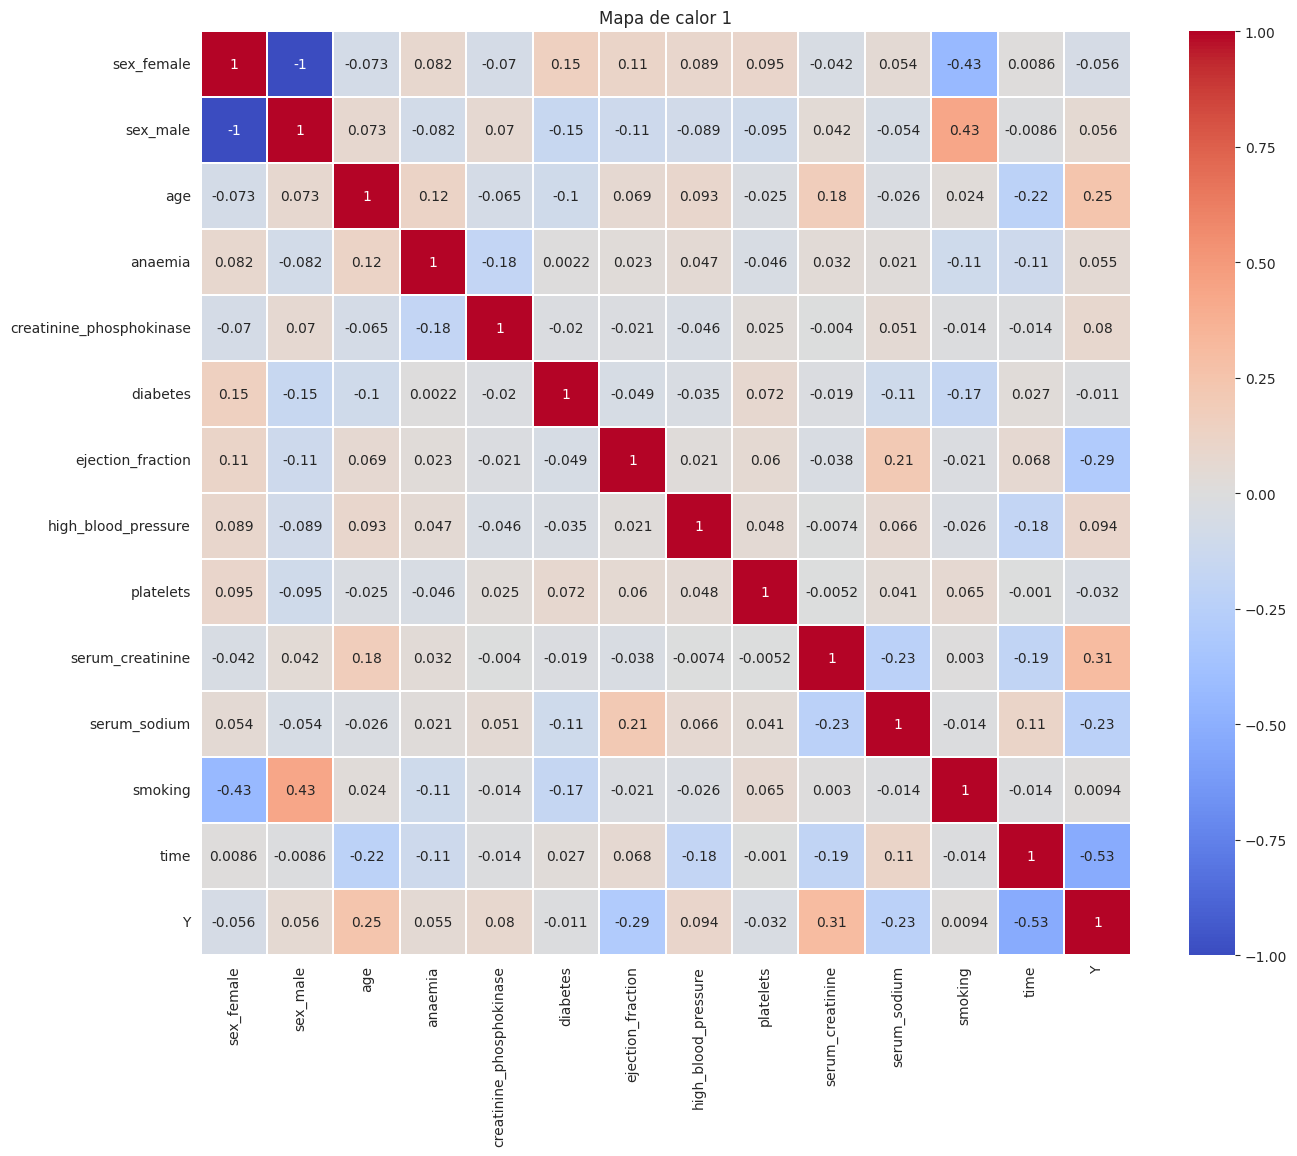

In [58]:
#Generar el mapa de calor de las correlaciones
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(cr, cmap='coolwarm', linewidths=0.30, annot=True)
#plt.savefig('attribute_correlations.png')
nuevas_etiquetas_x = ['sex_female', 'sex_male', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time','Y']
nuevas_etiquetas_y = nuevas_etiquetas_x
ax.set_xticklabels(nuevas_etiquetas_x, rotation=90)
ax.set_yticklabels(nuevas_etiquetas_y)
plt.title("Mapa de calor 1")
plt.show()

### Conlusiones

A diferencia de la variable sexo, el resto de las variables son numéricas, todos estos valores tienen distintas escalas y rangos, por lo que se tomó la decisión de normalizar los datos. 


A partir del mapa de calor 1, podemos concluir que nuestra hipótesis inicial es correcta, la edad es un factor determinante a la hora de fallecer por un ataque cardíaco. 

Del análisis de correlación podemos ver que la variable sexo no influye a hora de determinar si un paciente falleció o no por un ataque cardiaco, esto hubiese sido diferente si se hubiese conservado los datos iniciales 0: Femenino 1: Masculino, donde seguramente el sexo masculino hubiese tenido una gran correlación con la variable de salida, lo cual hubiese dado en una mala clasificación en los modelos desarrollados con este dataset. 

### Referencias

Heart failure prediction - clinical records . (2024, May 5). Kaggle. https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records 

Ortiz, I. R. H., PhD. (2024, January 16). Clasificación y optimización (fine tuning) con RANDOM FOREST para aprobación de un crédito en una institución financiera. Transformación de variables categóricas - GenSciNet. GenSciNet. https://genscinet.com/clasificacion-random-forest-prestamos/

Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.